# Import Statements

In [1]:
import pandas as pd # Imported to enable the use of datastructures like dataframe
import matplotlib.pyplot as plt # Imported to visusalise data
import seaborn as sns # Imported to visualise data
import numpy as np # Imported for calculations
from sklearn.feature_extraction.text import TfidfVectorizer # Imported to convert raw documents into a matrix of tf idf features
from sklearn.linear_model import LogisticRegression # Imported to enable the use of logistic regression to classify text
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # for report generation
from sklearn import metrics

In [2]:
## Importing the datasets
train_path='Original_Train_Data.xlsx'
val_path='Original_Val_Data.xlsx'
test_path='Original_Test_Data.xlsx'
new_test_path='/Users/sachin/Downloads/Assessing Labels/Agreements/Re-AnnotatedDataset.xlsx'
df_train = pd.read_excel(train_path, sheet_name='Sheet1')
df_val = pd.read_excel(val_path, sheet_name='Sheet1')
df_test = pd.read_excel(test_path, sheet_name='Sheet1')
df_new_test = pd.read_excel(new_test_path, sheet_name='Sheet1')


In [3]:
print(df_train.shape)
print(df_test)

(4851, 2)
               id                                               text  \
0        ml_sen_1            Bollywood film Newton inte remake aano?   
1        ml_sen_2  endukond viewrs koodunnilla ?? ippozhum 2.8m a...   
2        ml_sen_3  Mara paazhu mega mairananil ninnum ethil koodu...   
3        ml_sen_4                       Video nay cang xem cang thit   
4        ml_sen_5  Sunny chechiye kaanan vannathu njan maathram aano   
...           ...                                                ...   
1343  ml_sen_1344                          143k views and 145k likes   
1344  ml_sen_1345               Nasik doll tiltle bgm aane highlight   
1345  ml_sen_1346  Mohanlalile ishtapetta vekthiyayirunnu njan pa...   
1346  ml_sen_1347            ivaruku ivlo age nu sonna evan nambuvan   
1347  ml_sen_1348  Kanditt Amala Paul Aadai tamil mattoru version...   

           category  
0           Neutral  
1           Neutral  
2          Negative  
3     Not-Malayalam  
4           Neu

In [4]:
# Vectorization using TF-IDF
v = TfidfVectorizer()

# copy train('text') to x_train -> use fit transform
# copy train('category') to y_train

X_train = df_train['text']
y_train = df_train['category']

X_val = df_val['text']
y_val = df_val['category']

X_test = df_test['text']
y_test = df_test['category']

print(y_train.unique())
print(y_test.unique())

X_new_test = df_new_test['text']
y_new_test = df_new_test['Agreement']

print(y_new_test.unique())


# print(y_new_test.unique())

# copy test('text') to x_test -> use transform

# use transform on test - text

X_train_tfidf = v.fit_transform(X_train)
X_test_tfidf = v.transform(X_test)
X_new_test_tfidf = v.transform(X_new_test)



['Positive' 'Not-Malayalam' 'Neutral' 'Mixed_feelings' 'Negative']
['Neutral' 'Negative' 'Not-Malayalam' 'Positive' 'Mixed_feelings']
['Neutral' 'Mixed_feelings' 'Negative' 'Not-Malayalam' 'Positive']


# Training the model

In [5]:
# Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()


*************************************************
Original Research Results for Logistic Regression
*************************************************

Accuracy: 0.6476261127596439

Classification Report:
                 precision    recall  f1-score   support

Mixed_feelings       0.80      0.17      0.28        70
      Negative       0.77      0.36      0.49       138
       Neutral       0.66      0.60      0.63       398
 Not-Malayalam       0.74      0.51      0.61       177
      Positive       0.62      0.85      0.72       565

      accuracy                           0.65      1348
     macro avg       0.72      0.50      0.54      1348
  weighted avg       0.67      0.65      0.63      1348



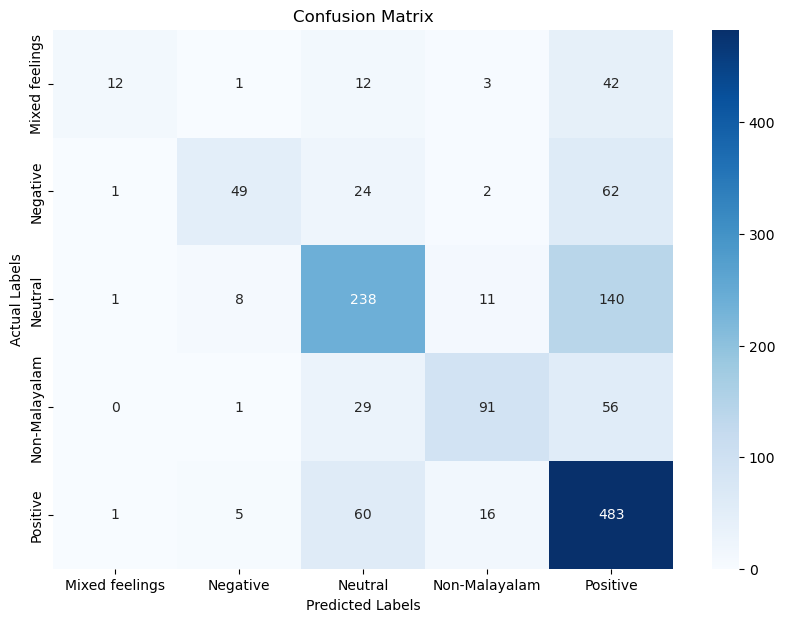

['Positive', 'Non-Malayalam', 'Neutral', 'Negative', 'Mixed feelings']

In [10]:
# Predictions and evaluation
predictions = log_reg.predict(X_test_tfidf)
print("\n*************************************************")
print("Original Research Results for Logistic Regression")
print("*************************************************\n")
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

# class_names = np.unique(y_test)  # Assuming y_test contains your actual labels

# Plotting the confusion matrix


# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)
class_names = ['Positive','Non-Malayalam','Neutral','Negative','Mixed feelings']  # Assuming y_test contains your actual labels

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names[::-1], yticklabels=class_names[::-1])
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

['Positive','Non-Malayalam','Neutral','Negative','Mixed feelings']


*************************************************
Results for Logistic Regression - newly annotated test dataset
*************************************************

Accuracy: 0.6313056379821959

Classification Report:
                 precision    recall  f1-score   support

Mixed_feelings       0.73      0.08      0.14       144
      Negative       0.80      0.31      0.45       162
       Neutral       0.58      0.64      0.61       327
 Not-Malayalam       0.39      0.54      0.45        89
      Positive       0.68      0.85      0.76       626

      accuracy                           0.63      1348
     macro avg       0.64      0.48      0.48      1348
  weighted avg       0.66      0.63      0.60      1348



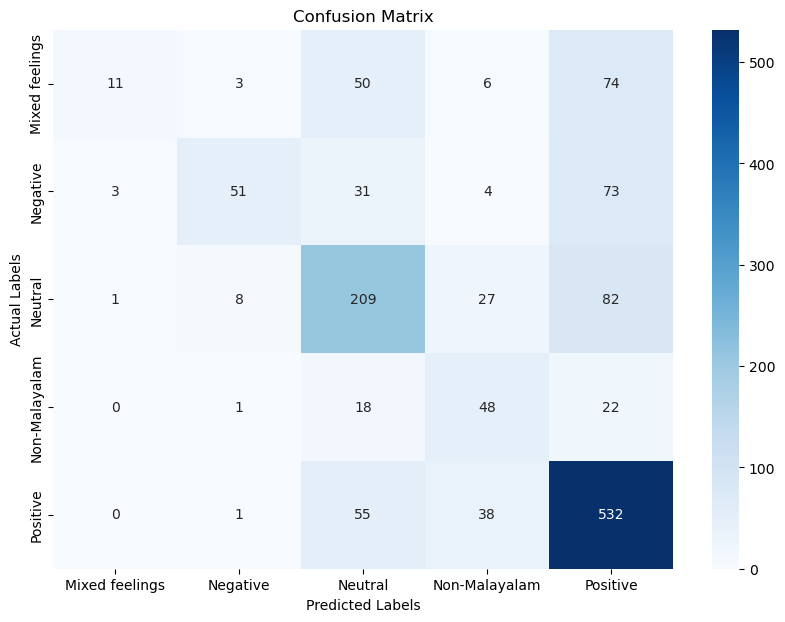

In [11]:
# Predictions and evaluation
new_predictions = log_reg.predict(X_new_test_tfidf)
print("\n*************************************************")
print("Results for Logistic Regression - newly annotated test dataset")
print("*************************************************\n")
print("Accuracy:", accuracy_score(y_new_test, new_predictions))
print("\nClassification Report:\n", classification_report(y_new_test, new_predictions, zero_division=1))

# Generate the confusion matrix
new_cm = confusion_matrix(y_new_test, new_predictions)
new_class_names = ['Positive','Non-Malayalam','Neutral','Negative','Mixed feelings']  # Assuming y_test contains your actual labels

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(new_cm, annot=True, fmt="d", cmap="Blues", xticklabels=new_class_names[::-1], yticklabels=new_class_names[::-1])
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()